In [1]:
import networkx as nx
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#parameters
Nini=5
Nmax=1000
m=3

In [3]:
#initialization
G=nx.complete_graph(Nini)

In [4]:
G.number_of_nodes()

5

In [5]:
G.number_of_edges()

10

In [6]:
#node attachment loop:
for t in range(Nini+1,Nmax):
    listNodes=G.nodes()
    selNodes=random.sample(G.nodes(),m)
    selEdges=[(t,i) for i in selNodes]
    G.add_edges_from(selEdges)

In [7]:
#degree distribution:
k=[G.degree(n) for n in G.nodes()]

In [10]:
def logBinning(degreeList,nbin):
    kmin=min(degreeList)
    kmax=max(degreeList)
    logBins = np.logspace(np.log10(kmin), np.log10(kmax),num=nbin)
    logBinDensity, binedges = np.histogram(degreeList, bins=logBins, density=True)
    logBins = np.delete(logBins, -1)
    return logBinDensity, logBins

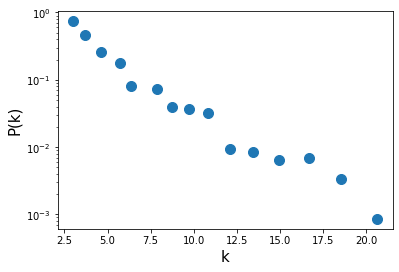

In [11]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

# several replicas

In [12]:
#parameters
Nini=5
Nmax=1000
m=3
NREPL=50

In [13]:
k=[]
for r in range(NREPL):
    #initialization
    G=nx.complete_graph(Nini)
    #node attachment loop:
    for t in range(Nini+1,Nmax):
        listNodes=G.nodes()
        selNodes=random.sample(G.nodes(),m)
        selEdges=[(t,i) for i in selNodes]
        G.add_edges_from(selEdges)
    k=k+[G.degree(n) for n in G.nodes()]

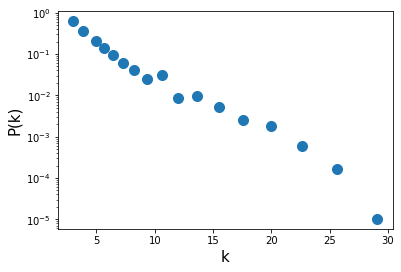

In [14]:
y,x=logBinning(np.array(k),20)
plt.semilogy(x,y,'o',markersize=10)
plt.xlabel('k',size=15)
plt.ylabel('P(k)',size=15)
plt.show()

# IT HAS AN EXPONENTIAL BEHAVIOR!!! IT IS NOT A POWER LAW